# Testing Knowledge with the day dataset

To download the dataset go to the [link](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)


In [4]:
import pandas as pd
import seaborn as sns
df=pd.read_csv("data/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In the test we will use only a specific attribut such as 

  * Season: Season (1:spring, 2:summer, 3:fall, 4:winter)
  * Temp: Normalized temperature in Celsius. 
  * Hum: Normalized humidity. 
  * Wind speed: Normalized wind speed. 
  * CNT: Count of total rental bikes. 

So lets delete the non used variables

In [7]:
df=df[["season","temp","hum","windspeed","cnt"]]
df

,season,temp,hum,windspeed,cnt
0,1,0.344167,0.805833,0.160446,985
1,1,0.363478,0.696087,0.248539,801
2,1,0.196364,0.437273,0.248309,1349
3,1,0.200000,0.590435,0.160296,1562
4,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...
726,1,0.254167,0.652917,0.350133,2114
727,1,0.253333,0.590000,0.155471,3095
728,1,0.253333,0.752917,0.124383,1341
729,1,0.255833,0.483333,0.350754,1796


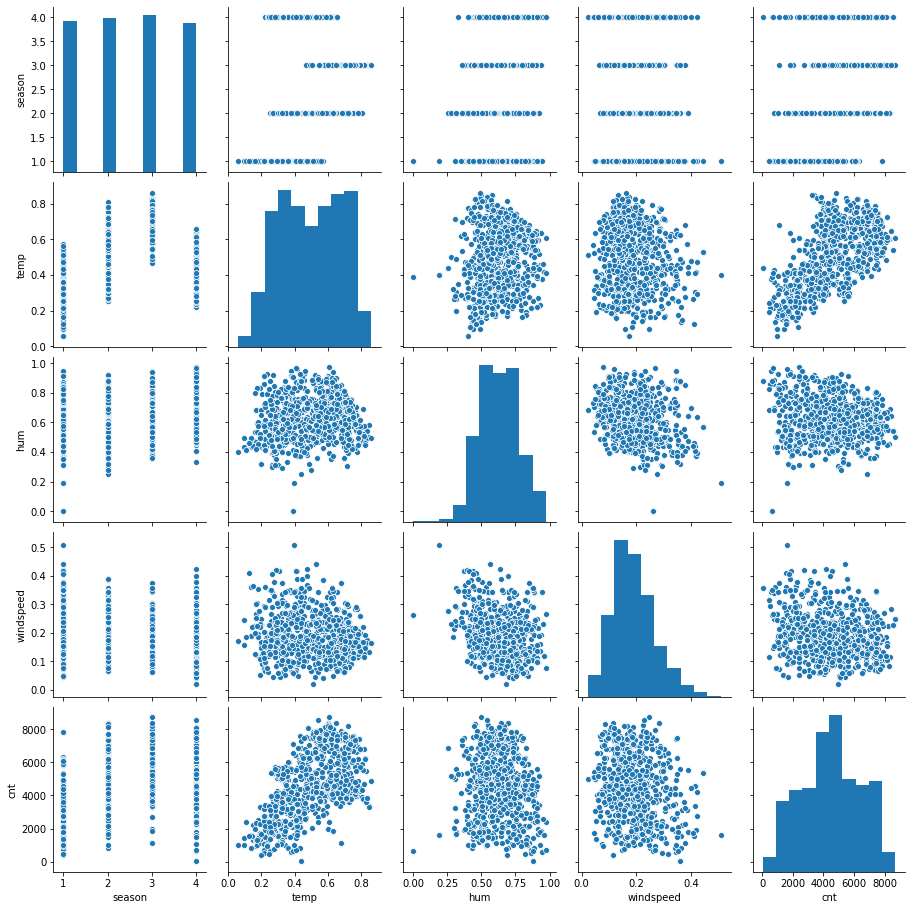

In [8]:
sns.pairplot(df)


Now let's calculate the correlation of all variable

In [10]:
df.corr()

,season,temp,hum,windspeed,cnt
season,1.000000,0.334315,0.205445,-0.229046,0.406100
temp,0.334315,1.000000,0.126963,-0.157944,0.627494
hum,0.205445,0.126963,1.000000,-0.248489,-0.100659
windspeed,-0.229046,-0.157944,-0.248489,1.000000,-0.234545
cnt,0.406100,0.627494,-0.100659,-0.234545,1.000000


* cnt is negative correlate with hum and windspeed event if the correlations are very low
* The array show that when windspeed increase
     * season is spring or summer
     * a colder temperature
     * a less humidity 
     * a slightthe count of total rental bikes 

In [56]:
users_spring=df[df["season"]==1]["cnt"]
users_summer=df[df["season"]==2].cnt
users_fall=df[df["season"]==3].cnt
users_winter=df[df["season"]==4].cnt
users_fall_mean=users_fall.mean()
users_spring_mean=users_spring.mean()
users_summer_mean=users_summer.mean()
users_winter_mean=users_winter.mean()
means=pd.DataFrame([[users_spring_mean,users_summer_mean,users_fall_mean,users_winter_mean]],index=["user mean"],columns=["spring","summer","fall","winter"])
means.iloc[0].max()

5644.303191489362

In [44]:
means

,spring,summer,fall,winter
user mean,2604.132597,4992.331522,5644.303191,4728.162921


We can conclude that people are more in fall season

Lets apply the  t test of the usage for  cnt of summer  and fall

In [57]:
from scipy import stats
result=stats.ttest_ind(users_summer,users_fall)
result

Ttest_indResult(statistic=-3.9765418611661243, pvalue=8.411509811510022e-05)

The p value is much lower than 0.05 so we can conclude that the user's summer and user's fall have not the same average

## Kolmogorov test on the temp,wind and hum variables


In [63]:
import numpy as np
df.temp=(df.temp-np.mean(df["temp"]))/np.std(df.temp)
result=stats.kstest(df.temp,"norm")
result

KstestResult(statistic=0.07282591241722414, pvalue=0.0008118777412465271)

the p value is much lower than 0.05 so the temp variable is not normaly distributed

In [65]:
df.hum=(df.hum-np.mean(df["hum"]))/np.std(df.hum)
result=stats.kstest(df.hum,"norm")
result

KstestResult(statistic=0.0340224746032709, pvalue=0.35995840249203215)

The p value is larger than 0.05 .So we can conclude if the variable hum was normaly distributed we could have 35% de chance to have the right values of hum in the dataset

In [68]:
# Take the log of windpseed:
df['logwindspeed'] = np.log(df.windspeed +1)

# Normalize the new logwindspeed variable:
df['logwindspeed_c'] = (df['logwindspeed'] - df['logwindspeed'].mean()) / df['logwindspeed'].std()
result=stats.kstest(df.logwindspeed_c , 'norm')
result

KstestResult(statistic=0.04977846893415816, pvalue=0.05163075955987017)

According to the test we cannot conclude nothing because the ktest is inconclusive

### HHHHAAAAAAAAAAA zero faute test valide khana nekhhhh  wa docko io ki es tiiiiiii????